Philippe Joly
MAIS 202

This is an implementation of Support Vector Regression (SVR) on Electrical Power Output based on the Weather in Quebec

# Imports

In [35]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from skopt import BayesSearchCV
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime as dt
import pickle

# Data Retrieval

In [36]:
train = pd.read_csv('../../data/train_static.csv')
val = pd.read_csv('../../data/val_static.csv')
test = pd.read_csv('../../data/test_static.csv')

# Data Preprocessing

In [37]:
train.head()

,Date/Time (UTC),Temp (°C),Year,Month,Day,Hour,Day of Week,Population,Average Power Output (MW)
0,2019-01-01 01:00:00,-3.129954,2019,1,1,1,2,8430363,23762.55
1,2019-01-01 02:00:00,-3.200603,2019,1,1,2,2,8430363,23830.23
2,2019-01-01 03:00:00,-2.736991,2019,1,1,3,2,8430363,23608.07
3,2019-01-01 04:00:00,-1.625532,2019,1,1,4,2,8430363,23562.48
4,2019-01-01 05:00:00,0.933287,2019,1,1,5,2,8430363,23546.16


In [38]:
train['Date/Time (UTC)'] = pd.to_datetime(train['Date/Time (UTC)'])

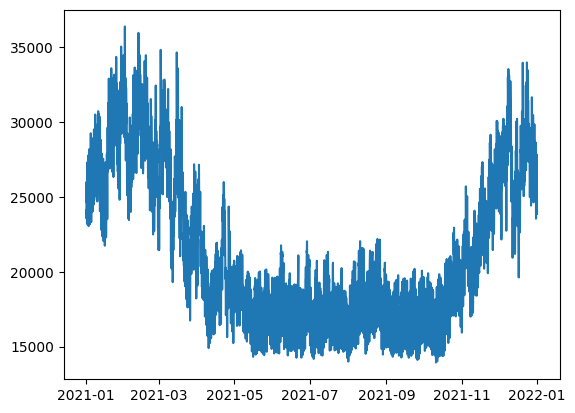

In [39]:
plt.plot(train[train['Date/Time (UTC)'].dt.year==2021]['Date/Time (UTC)'], train[train['Date/Time (UTC)'].dt.year==2021]['Average Power Output (MW)'])

In [40]:

train.drop(columns=['Date/Time (UTC)','Year'], inplace=True)
val.drop(columns=['Date/Time (UTC)','Year'], inplace=True)
test.drop(columns=['Date/Time (UTC)','Year'], inplace=True)

train = train[train["Month"]==6]
val = val[val["Month"]==6]
test = test[test["Month"]==6]


X = train.drop(columns=["Average Power Output (MW)"]).values
y = train["Average Power Output (MW)"].values

X_val = val.drop(columns=["Average Power Output (MW)"]).values
y_val = val["Average Power Output (MW)"].values

X_test = test.drop(columns=["Average Power Output (MW)"]).values
y_test = test["Average Power Output (MW)"].values

In [41]:
y = y.reshape(len(y), 1)
y_val = y_val.reshape(len(y_val), 1)
y_test = y_test.reshape(len(y_test), 1)

x_scaler = StandardScaler().fit(X)
y_scaler = StandardScaler().fit(y)

X = x_scaler.transform(X)
y = y_scaler.transform(y)

X_val = x_scaler.transform(X_val)
y_val = y_scaler.transform(y_val)

X_test = x_scaler.transform(X_test)
y_test = y_scaler.transform(y_test)

y = y.reshape(y.shape[0])
y_val = y_val.reshape(y_val.shape[0])
y_test = y_test.reshape(y_test.shape[0])

# Hyper-Parameter Tuning

In [42]:
svr = SVR()

In [43]:
opt_params=[{
    'C': np.logspace(-4,4,10),
    'gamma': np.logspace(-6,1,10),
    'epsilon': [0.01, 0.1, 0.2, 0.5],
    'kernel': ['rbf'],
    'max_iter': [1000]
}]

In [44]:
clf = BayesSearchCV(svr, search_spaces=opt_params, cv=3, verbose=False, n_jobs=-1, n_iter=200)
best_clf = clf.fit(X,y)

c:\Users\philj\AppData\Local\Programs\Python\Python310\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
c:\Users\philj\AppData\Local\Programs\Python\Python310\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
c:\Users\philj\AppData\Local\Programs\Python\Python310\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
c:\Users\philj\AppData\Local\Programs\Python\Python310\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
c:\Users\philj\AppData\Local\Programs\Python\Python310\lib\site-packages\skopt\optimizer\opt

In [45]:
results = pd.DataFrame(best_clf.cv_results_).sort_values(by="rank_test_score", ascending=True)

In [46]:
results.head(25)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_epsilon,param_gamma,param_kernel,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
128,0.088049,0.006189,0.091581,0.007875,0.359381,0.2,0.278256,rbf,1000,"{'C': 0.3593813663804626, 'epsilon': 0.2, 'gam...",0.483033,0.618998,0.618219,0.573417,0.063912,1
170,0.093599,0.009039,0.085841,0.003687,0.359381,0.2,0.278256,rbf,1000,"{'C': 0.3593813663804626, 'epsilon': 0.2, 'gam...",0.483033,0.618998,0.618219,0.573417,0.063912,1
166,0.089642,0.006523,0.087695,0.007361,0.359381,0.2,0.278256,rbf,1000,"{'C': 0.3593813663804626, 'epsilon': 0.2, 'gam...",0.483033,0.618998,0.618219,0.573417,0.063912,1
57,0.081868,0.003125,0.094396,0.009641,0.359381,0.2,0.278256,rbf,1000,"{'C': 0.3593813663804626, 'epsilon': 0.2, 'gam...",0.483033,0.618998,0.618219,0.573417,0.063912,1
126,0.084699,0.002173,0.100318,0.012011,0.359381,0.2,0.278256,rbf,1000,"{'C': 0.3593813663804626, 'epsilon': 0.2, 'gam...",0.483033,0.618998,0.618219,0.573417,0.063912,1
157,0.095066,0.007490,0.078816,0.002131,0.359381,0.2,0.278256,rbf,1000,"{'C': 0.3593813663804626, 'epsilon': 0.2, 'gam...",0.483033,0.618998,0.618219,0.573417,0.063912,1
176,0.098421,0.009757,0.105384,0.002838,0.359381,0.2,0.278256,rbf,1000,"{'C': 0.3593813663804626, 'epsilon': 0.2, 'gam...",0.483033,0.618998,0.618219,0.573417,0.063912,1
188,0.095917,0.006601,0.111332,0.003682,0.359381,0.2,0.278256,rbf,1000,"{'C': 0.3593813663804626, 'epsilon': 0.2, 'gam...",0.483033,0.618998,0.618219,0.573417,0.063912,1
189,0.106141,0.003300,0.102000,0.006506,0.359381,0.2,0.278256,rbf,1000,"{'C': 0.3593813663804626, 'epsilon': 0.2, 'gam...",0.483033,0.618998,0.618219,0.573417,0.063912,1
147,0.090592,0.007309,0.098329,0.007085,0.359381,0.2,0.278256,rbf,1000,"{'C': 0.3593813663804626, 'epsilon': 0.2, 'gam...",0.483033,0.618998,0.618219,0.573417,0.063912,1


In [47]:
best_clf.best_score_

0.5734168855553293

In [48]:
model_ls = []
err = []
for i in range(10):
    err.append([])
    model = SVR(**results['params'].iloc[i])
    model.fit(X, y)
    y_pred = model.predict(X_val)
    err[i].append(mean_squared_error(y_val, y_pred))
    err[i].append(r2_score(y_val, y_pred))
    err[i].append(mean_absolute_error(y_val, y_pred))
    model_ls.append(model)

c:\Users\philj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\philj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\philj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\philj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\U

In [49]:
err

[[0.17192450957733957, 0.8441611688915883, 0.3303091585973908],
 [0.17192450957733957, 0.8441611688915883, 0.3303091585973908],
 [0.17192450957733957, 0.8441611688915883, 0.3303091585973908],
 [0.17192450957733957, 0.8441611688915883, 0.3303091585973908],
 [0.17192450957733957, 0.8441611688915883, 0.3303091585973908],
 [0.17192450957733957, 0.8441611688915883, 0.3303091585973908],
 [0.17192450957733957, 0.8441611688915883, 0.3303091585973908],
 [0.17192450957733957, 0.8441611688915883, 0.3303091585973908],
 [0.17192450957733957, 0.8441611688915883, 0.3303091585973908],
 [0.17192450957733957, 0.8441611688915883, 0.3303091585973908]]

In [50]:
# f = "svr_bayes_rbf"
# pickle.dump(model_ls[0], open(f, "wb"))

In [51]:
# svr_rbf = SVR()

In [52]:
# opt_params=[{
#     'C': np.logspace(-4,4,10),
#     'gamma': np.logspace(-6,1,10),
#     'epsilon': [0.01, 0.1, 0.2, 0.5],
#     'tol': [1e-3, 1e-4, 1e-5],
#     'kernel': ['rbf'],
#     'max_iter': [100,1000]
# }]

In [53]:
# clf_rbf = BayesSearchCV(svr_rbf, search_spaces=opt_params, cv=3, verbose=False, n_jobs=-1, n_iter=200)
# best_clf_rbf = clf_rbf.fit(X,y)

In [54]:
# results_rbf = pd.DataFrame(best_clf_rbf.cv_results_).sort_values(by="rank_test_score", ascending=True, ignore_index=True)

In [55]:

# for i in range(100):
#     print(results_rbf['params'].iloc[i])
# results_rbf.tail(25)

In [56]:
# best_clf_rbf.best_score_

# Model and Training

# Testing